# Image Classifier Project

In [19]:
!pip install --upgrade pip
!pip install pandas numpy matplotlib scikit-learn

In [20]:
!pip install tensorflow

## Import libraries

In [2]:
# Step 0. Load libraries and custom modules
# System --------------------------------------------------------
import os
import pathlib
# Dataframes and matrices ---------------------------------------
import numpy as np
import pandas as pd
# Graphics ------------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Machine learning ----------------------------------------------
from sklearn.model_selection import train_test_split
# Deep learning -------------------------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import get_file
from keras.utils import image_dataset_from_directory

2022-08-14 02:42:57.060770: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-14 02:42:57.060838: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Load and plot the first nine photos of dogs in a single figure. Repeat the same for cats. 

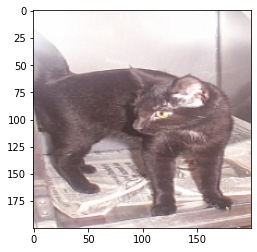

In [22]:
# Sample a cat image
sample_cat = mpimg.imread('Pets/Cat/image3814.jpg')
plt.imshow(sample_cat)
plt.show()

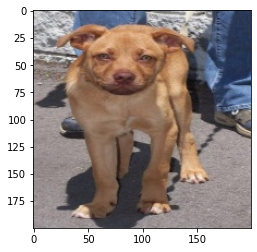

In [23]:
# Sample a dog image
sample_dog = mpimg.imread('Pets/Dog/image8941.jpg')
plt.imshow(sample_dog)
plt.show()

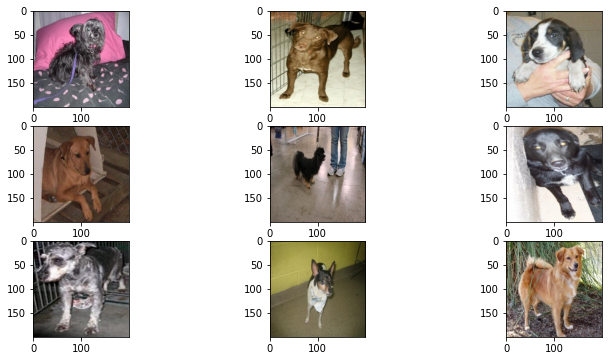

In [5]:
plt.figure(figsize=(12,6))
# define location of dataset
folder = 'Pets/Dog/'
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'image000' + str(i) + '.jpg'
	image = mpimg.imread(filename)
	plt.imshow(image)
# show the figure
plt.show()

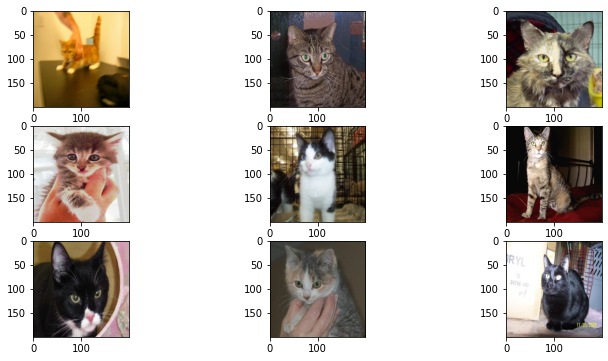

In [6]:
plt.figure(figsize=(12,6))
# define location of dataset
folder = 'Pets/Cat/'
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'image000' + str(i) + '.jpg'
	image = mpimg.imread(filename)
	plt.imshow(image)
# show the figure
plt.show()

## Create an object of ImageDataGenerator for both training and testing data

In [24]:
# Count total images
data_dir = pathlib.Path('./Pets')
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

24946

In [25]:
# Let's follow this tutorial: https://www.tensorflow.org/tutorials/load_data/images
# Create train dataset
IMAGE_WITDH = 200
IMAGE_HEIGHT = 200
BATCH_SIZE = 32
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(200, 200),
  batch_size=32)

Found 24946 files belonging to 2 classes.
Using 19957 files for training.


In [26]:
# Create validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(200, 200),
  batch_size=32)

Found 24946 files belonging to 2 classes.
Using 4989 files for validation.


In [27]:
# Read the classes
class_names = train_ds.class_names
print(class_names)

['Cat', 'Dog']


## Create model

In [28]:
# Create the deep learning architecture
IMAGE_CHANNELS=3
IMAGE_WIDTH=200
IMAGE_HEIGHT=200
model = Sequential([

Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(64, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(128, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Flatten(),
Dense(512, activation='relu'),
BatchNormalization(),
Dropout(0.5),
Dense(1, activation='sigmoid'), # 2 because we have cat and dog classes
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 198, 198, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 97, 97, 64)       2

## Train model

In [29]:
# Fit the model
history=model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
624/624 [==============================] - 851s 1s/step - loss: 0.6742 - accuracy: 0.6658 - val_loss: 0.5983 - val_accuracy: 0.6721
Epoch 2/10
624/624 [==============================] - 828s 1s/step - loss: 0.5015 - accuracy: 0.7546 - val_loss: 0.5063 - val_accuracy: 0.7587
Epoch 3/10
624/624 [==============================] - 806s 1s/step - loss: 0.4328 - accuracy: 0.8003 - val_loss: 0.4365 - val_accuracy: 0.8014
Epoch 4/10
624/624 [==============================] - 831s 1s/step - loss: 0.3750 - accuracy: 0.8301 - val_loss: 0.6373 - val_accuracy: 0.7537
Epoch 5/10
624/624 [==============================] - 861s 1s/step - loss: 0.3156 - accuracy: 0.8659 - val_loss: 0.4374 - val_accuracy: 0.8162
Epoch 6/10
624/624 [==============================] - 840s 1s/step - loss: 0.2582 - accuracy: 0.8937 - val_loss: 1.5426 - val_accuracy: 0.5709
Epoch 7/10
624/624 [==============================] - 864s 1s/step - loss: 0.2585 - accuracy: 0.8917 - val_loss: 1.5299 - val_accuracy: 0.5614

In [30]:
# Save model

model.save('model.h5')

## Once you have trained the model, visualise training/validation accuracy and loss.

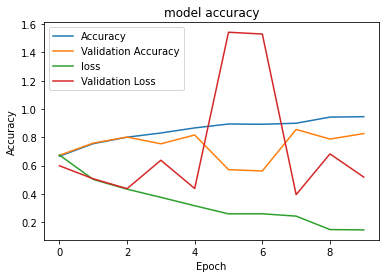

In [31]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

## Make predictions

1/1 [==============================] - 0s 45ms/step
This image is 96.85 percent cat and 3.15 percent dog.


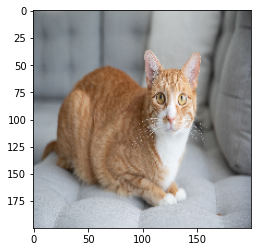

In [67]:
img = keras.preprocessing.image.load_img("cat.jpg", target_size=(200,200))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]

print("This image is %.2f percent cat and %.2f percent dog." % (100 * (1 - score), 100 * score))

plt.imshow(img)
plt.show()

1/1 [==============================] - 0s 40ms/step
This image is 3.37 percent cat and 96.63 percent dog.


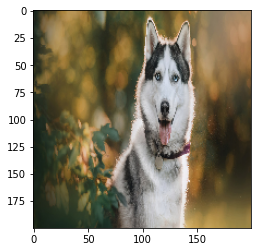

In [63]:
img = keras.preprocessing.image.load_img("perro.jpg", target_size=(200,200))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]

print("This image is %.2f percent cat and %.2f percent dog." % (100 * (1 - score), 100 * score))

plt.imshow(img)
plt.show()